In [ ]:

import pandas as pd

# Load the dataset
df = pd.read_csv('cleaned_youtube_comments.csv')

# Example kafkaesque keywords (expand this list as needed)
kafka_keywords = ["depression", "hopeless", "meaningless", "alienation", 'irrational', 'absurd', 'surreal', 'alienated', 'isolated', 'bizarre', 
                           'bureaucracy', 'system', 'powerless', 'trapped', 'despair', 'Kafka', 
                           'trial', 'judgment', 'law', 'control', 'Kafkaesque', 'existential', 
                           'nightmarish', 'futility', 'dread', 'imprisonment', 'dehumanization', 
                           'indifference', 'hopeless', 'confusion', 'trapped', 'unresolvable']

# Function to classify comments
def classify_comment(comment):
    for kw in kafka_keywords:
        if kw in comment.lower():
            return "kafkaesque"
    return "normal"

# Apply classification
df["category"] = df["comment"].apply(classify_comment)

# Save with new column
# df.to_csv("classified_comments.csv", index=False)


In [ ]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('cleaned_youtube_comments.csv')

explicit_roots = [
    r"depress", r"hopeless", r"meaningless", r"alienat", r"irrational", r"absurd",
    r"surreal", r"alienat", r"isolat", r"bizarre", r"bureaucrac", r"powerless",
    r"despair", r"kafka", r"trial", r"judgment", r"law", r"control",
    r"kafkaesque", r"existential", r"nightmar", r"futilit", r"dread",
    r"imprison", r"dehumaniz", r"indifference", r"confus", r"unresolv"
]

EXPLICIT_RE = re.compile(r"\b(?:" + "|".join(fr"{root}[\w-]*" for root in explicit_roots) + r")\b", re.IGNORECASE)


implicit_patterns = [
    r"\bfeel(s|ing)? trapped\b",
    r"\bno way out\b",
    r"\bendless (wait|waiting)\b",
    r"\b(waiting|queueing?) forever\b",
    r"\bstuck in (a )?(loop|maze|labyrinth)\b",
    r"\bthe system (is|was|feels) (against|broken)\b",
    r"\bcan('?t|not) escape\b",
    r"\b(red )?tape\b",
    r"\bforms? after forms?\b",
    r"\barbitrary rules?\b",
]
IMPLICIT_RE = re.compile("|".join(implicit_patterns), re.IGNORECASE)


def classify_comment(comment: str) -> str:
    if EXPLICIT_RE.search(comment):
        return "explicit_kafkaesque"
    if IMPLICIT_RE.search(comment):
        return "implicit_kafkaesque"
    return "normal"

df["category"] = df["comment"].apply(classify_comment)


# Save with categories
df.to_csv("classified_comments.csv", index=False)



In [ ]:
# Count how many are kafkaesque vs normal
counts = df["category"].value_counts()

print(counts)

In [ ]:
import matplotlib.pyplot as plt

# Get value counts
counts = df['category'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Kafkaesque Classification Counts", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("classification_counts.png")
plt.show()


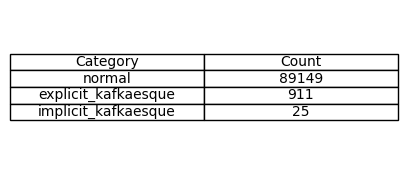

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get counts
counts_df = df['category'].value_counts().reset_index()
counts_df.columns = ['Category', 'Count']

# Plot table
fig, ax = plt.subplots(figsize=(5, 2))
ax.axis('off')
table = ax.table(cellText=counts_df.values, colLabels=counts_df.columns, cellLoc='center', loc='center')


plt.savefig("classification_table.png")
plt.show()
